# Logistic Data Analysis

This notebook is analyzing the Logistic simulation study

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_rows = 500

# b0.01 case


In [2]:
load_path = r"G:\My Drive\Studium\UNIGE_Master\Thesis\Master_Thesis\Data\Logistic_Data_processed\Logistic_Processed_data_b0.01.pkl"
#load_path = r"G:\My Drive\Studium\UNIGE_Master\Thesis\Master_Thesis\Data\Logistic_Data_processed\Logistic_Processed_data_b0.1.pkl"
#load_path = r"G:\My Drive\Studium\UNIGE_Master\Thesis\Master_Thesis\Data\Logistic_Data_processed\Logistic_Processed_data_bAUTO.pkl"


#loading the data

df = pd.read_pickle(load_path)

df

,alpha_hat,alpha,dim,b,xsize,ysize,ID
0,0.400000,0.3,5,b0.01,1000,1000,1
1,0.304718,0.3,5,b0.01,1000,1000,1
2,0.225792,0.3,5,b0.01,1000,1000,1
3,0.165569,0.3,5,b0.01,1000,1000,1
4,0.131693,0.3,5,b0.01,1000,1000,1
...,...,...,...,...,...,...,...
119995,0.812847,0.7,10,b0.01,100,100,150
119996,0.789218,0.7,10,b0.01,100,100,150
119997,0.766024,0.7,10,b0.01,100,100,150
119998,0.742993,0.7,10,b0.01,100,100,150


In [3]:
df.shape[0] #


45000000

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45000000 entries, 0 to 119999
Data columns (total 7 columns):
 #   Column     Dtype  
---  ------     -----  
 0   alpha_hat  float64
 1   alpha      float64
 2   dim        int32  
 3   b          object 
 4   xsize      int32  
 5   ysize      int32  
 6   ID         int32  
dtypes: float64(2), int32(4), object(1)
memory usage: 2.0+ GB


# Notes



* A LOT of NaN values
* when b0.01 or 0.1 it's even worse, AUTO is slightly better
* 0.05, 0.1 and 0.95 fail, 0.3 and 0.7 seem to work more or less
* estimation gets better with bigger d, higher xsize and higher ysize

# Full Aggregation

In [5]:
df

,alpha_hat,alpha,dim,b,xsize,ysize,ID
0,0.400000,0.3,5,b0.01,1000,1000,1
1,0.304718,0.3,5,b0.01,1000,1000,1
2,0.225792,0.3,5,b0.01,1000,1000,1
3,0.165569,0.3,5,b0.01,1000,1000,1
4,0.131693,0.3,5,b0.01,1000,1000,1
...,...,...,...,...,...,...,...
119995,0.812847,0.7,10,b0.01,100,100,150
119996,0.789218,0.7,10,b0.01,100,100,150
119997,0.766024,0.7,10,b0.01,100,100,150
119998,0.742993,0.7,10,b0.01,100,100,150


In [6]:
# %%
def last_150_rows(group):
    return group.tail(150)

full_group_by = ["alpha", "dim", "b", "xsize", "ysize", "ID"]

df_last_150 = df.groupby(full_group_by).apply(last_150_rows).reset_index(drop=True)

df_last_150

# %%
df_last_150_aggregated = df_last_150.groupby(full_group_by).agg(["count", 'mean', "std"])
df_last_150_aggregated

# %% [markdown]
# # correct aggregation
# 

# %%
df_last_150_sanity = df_last_150.groupby(full_group_by).agg(['mean'])
df_last_150_sanity_index_reset = df_last_150_sanity.reset_index()
df_last_150_sanity_index_reset

# %%
df_last_150_proper_aggregation = df_last_150_sanity.reset_index().drop(["ID"], axis=1).groupby(["alpha", "dim", "b", "xsize", "ysize"]).agg(["count","mean", "std"])
df_last_150_proper_aggregation

# %%
df_last_150_proper_aggregation.columns = df_last_150_proper_aggregation.columns.droplevel(level=1)
df_last_150_proper_aggregation

# %%
df_last_150_proper_aggregation_index_reset = df_last_150_proper_aggregation.reset_index()
df_last_150_proper_aggregation_index_reset.head()

# %%


# %%




C:\Users\nickk\AppData\Local\Temp\ipykernel_15176\1890761486.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_last_150 = df.groupby(full_group_by).apply(last_150_rows).reset_index(drop=True)
C:\Users\nickk\AppData\Local\Temp\ipykernel_15176\1890761486.py:25: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df_last_150_proper_aggregation = df_last_150_sanity.reset_index().drop(["ID"], axis=1).groupby(["alpha", "dim", "b", "xsize", "ysize"]).agg(["count","mean", "std"])


alpha dim      b xsize ysize alpha_hat                    
                                   count      mean       std
0  0.05   1  b0.01    50    50         7  0.498718  0.049592
1  0.05   1  b0.01   100    50        14  0.478022  0.164121
2  0.05   1  b0.01   100   100        13  0.535243  0.184714
3  0.05   1  b0.01   200    50        29  0.492002  0.227716
4  0.05   1  b0.01   200   100        18  0.521967  0.256115

In [7]:
# %%
saving_path_result_data = f"/home/users/k/kipfer2/Logistics_processed_results/processed_tables"

# %%
data_output = df_last_150_proper_aggregation_index_reset[df_last_150_proper_aggregation_index_reset["b"]=="b0.1"]
data_output.to_pickle(f"{saving_path_result_data}/Logistics_result_b0.1.pkl")
data_output.to_csv(f"{saving_path_result_data}/Logistics_result_b0.1.csv")

# %%
data_output = df_last_150_proper_aggregation_index_reset[df_last_150_proper_aggregation_index_reset["b"]=="b0.01"]
data_output.to_pickle(f"{saving_path_result_data}/Logistics_result_b0.01.pkl")
data_output.to_csv(f"{saving_path_result_data}/Logistics_result_b0.01.csv")

data_output = df_last_150_proper_aggregation_index_reset[df_last_150_proper_aggregation_index_reset["b"]=="bAUTO"]
data_output.to_pickle(f"{saving_path_result_data}/Logistics_result_bAUTO.pkl")
data_output.to_csv(f"{saving_path_result_data}/Logistics_result_bAUTO.csv")

OSError: Cannot save file into a non-existent directory: '\home\users\k\kipfer2\Logistics_processed_results\processed_tables'

# Convergence plots b0.01 case

In [8]:
df = df.reset_index(drop=True)
df

,alpha_hat,alpha,dim,b,xsize,ysize,ID
0,0.400000,0.3,5,b0.01,1000,1000,1
1,0.304718,0.3,5,b0.01,1000,1000,1
2,0.225792,0.3,5,b0.01,1000,1000,1
3,0.165569,0.3,5,b0.01,1000,1000,1
4,0.131693,0.3,5,b0.01,1000,1000,1
...,...,...,...,...,...,...,...
44999995,0.812847,0.7,10,b0.01,100,100,150
44999996,0.789218,0.7,10,b0.01,100,100,150
44999997,0.766024,0.7,10,b0.01,100,100,150
44999998,0.742993,0.7,10,b0.01,100,100,150


In [9]:
df.columns

Index(['alpha_hat', 'alpha', 'dim', 'b', 'xsize', 'ysize', 'ID'], dtype='object')

In [10]:
df.shape[0]/800/150 # in total there are 3*375 parameter combinations, this checks out

375.0

In [11]:
number_iterations = 800
df = pd.concat([df, pd.DataFrame.from_dict({"Iteration": np.tile(np.arange(number_iterations),int(df.shape[0]/number_iterations))})], axis=1)
df

,alpha_hat,alpha,dim,b,xsize,ysize,ID,Iteration
0,0.400000,0.3,5,b0.01,1000,1000,1,0
1,0.304718,0.3,5,b0.01,1000,1000,1,1
2,0.225792,0.3,5,b0.01,1000,1000,1,2
3,0.165569,0.3,5,b0.01,1000,1000,1,3
4,0.131693,0.3,5,b0.01,1000,1000,1,4
...,...,...,...,...,...,...,...,...
44999995,0.812847,0.7,10,b0.01,100,100,150,795
44999996,0.789218,0.7,10,b0.01,100,100,150,796
44999997,0.766024,0.7,10,b0.01,100,100,150,797
44999998,0.742993,0.7,10,b0.01,100,100,150,798


In [12]:
param_combinations = df.groupby(["alpha", "dim", "b", "xsize", "ysize"]).groups.keys()
param_combinations

dict_keys([(0.05, 1, 'b0.01', 50, 50), (0.05, 1, 'b0.01', 100, 50), (0.05, 1, 'b0.01', 100, 100), (0.05, 1, 'b0.01', 200, 50), (0.05, 1, 'b0.01', 200, 100), (0.05, 1, 'b0.01', 200, 200), (0.05, 1, 'b0.01', 500, 50), (0.05, 1, 'b0.01', 500, 100), (0.05, 1, 'b0.01', 500, 200), (0.05, 1, 'b0.01', 500, 500), (0.05, 1, 'b0.01', 1000, 50), (0.05, 1, 'b0.01', 1000, 100), (0.05, 1, 'b0.01', 1000, 200), (0.05, 1, 'b0.01', 1000, 500), (0.05, 1, 'b0.01', 1000, 1000), (0.05, 2, 'b0.01', 50, 50), (0.05, 2, 'b0.01', 100, 50), (0.05, 2, 'b0.01', 100, 100), (0.05, 2, 'b0.01', 200, 50), (0.05, 2, 'b0.01', 200, 100), (0.05, 2, 'b0.01', 200, 200), (0.05, 2, 'b0.01', 500, 50), (0.05, 2, 'b0.01', 500, 100), (0.05, 2, 'b0.01', 500, 200), (0.05, 2, 'b0.01', 500, 500), (0.05, 2, 'b0.01', 1000, 50), (0.05, 2, 'b0.01', 1000, 100), (0.05, 2, 'b0.01', 1000, 200), (0.05, 2, 'b0.01', 1000, 500), (0.05, 2, 'b0.01', 1000, 1000), (0.05, 5, 'b0.01', 50, 50), (0.05, 5, 'b0.01', 100, 50), (0.05, 5, 'b0.01', 100, 100), (0

In [13]:
saving_path_convergence = r"G:\My Drive\Studium\UNIGE_Master\Thesis\Master_Thesis\Data\Logistic_Convergence_charts"

# Convergence Charts

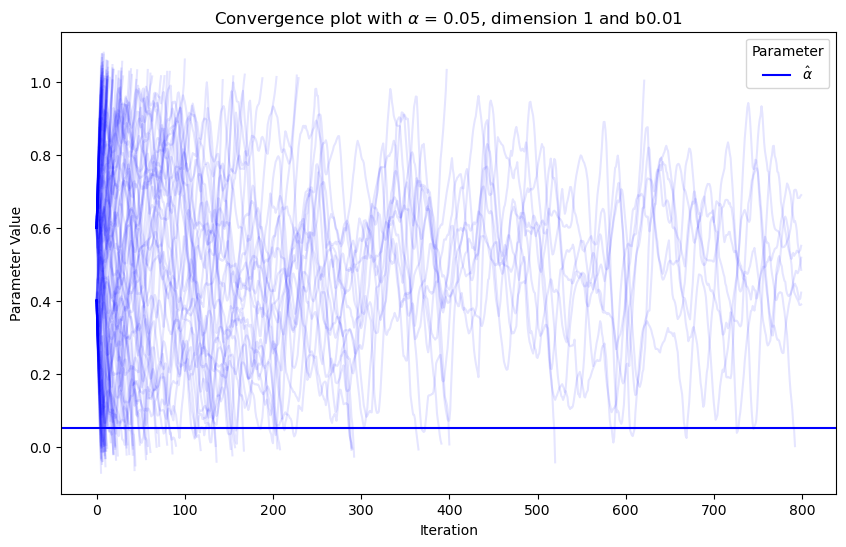

created and saved 1 figures


In [16]:
counter = 0
for alpha, dim, b, xsize, ysize in param_combinations:
    simulations_df = df[(df["alpha"]==alpha) & (df["dim"]==dim) 
		     & (df["b"]==b) & (df["xsize"]==xsize) & (df["ysize"]==ysize)]
	
    melted_df = simulations_df.melt(id_vars=["ID", "Iteration"],
		    value_vars=["alpha_hat"],
		    var_name = "param_type",
		    value_name = "param_value")
    

    # Initialize the plot
    plt.figure(figsize=(10, 6))
    
    # Plot all lines for each ID
    for param_type, color in zip(["alpha_hat"], ["blue"]):
        subset = melted_df[melted_df["param_type"] == param_type]
        sns.lineplot(data=subset, x='Iteration', y='param_value', units='ID', estimator=None, color=color, alpha=0.1)
    
    # Add horizontal reference lines for mu and sigma
    plt.axhline(y=alpha, color="blue", linestyle='-', label=r'$\hat\alpha$')
    
    
    plt.ylabel("Parameter Value")

    alpha_symbol = r'$\alpha$'
    plt.title(f"Convergence plot with {alpha_symbol} = {alpha}, dimension {dim} and {b}")

    # Adjust the legend
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), title='Parameter')
    
    file_name = f"alpha{alpha}_dim{dim}_b{b}_xsize{xsize}_ysize{ysize}.png"
    #plt.savefig(f"{saving_path_convergence}/{file_name}")
    plt.show()
    plt.close()

    counter += 1
    print(f"created and saved {counter} figures")

    if counter == 1:

        break

# Violin Charts

In [17]:
saving_path_sample_size_effect = r"/home/users/k/kipfer2/Gauss_processed_results/violin_charts"

In [18]:
df_last_150_aggregated_index_reset = df_last_150_aggregated.reset_index()

In [19]:
param_combinations = df_last_150_aggregated_index_reset.groupby(["alpha", "dim", "b"]).groups.keys()
param_combinations

dict_keys([(0.05, 1, 'b0.01'), (0.05, 2, 'b0.01'), (0.05, 5, 'b0.01'), (0.05, 10, 'b0.01'), (0.05, 20, 'b0.01'), (0.1, 1, 'b0.01'), (0.1, 2, 'b0.01'), (0.1, 5, 'b0.01'), (0.1, 10, 'b0.01'), (0.1, 20, 'b0.01'), (0.3, 1, 'b0.01'), (0.3, 2, 'b0.01'), (0.3, 5, 'b0.01'), (0.3, 10, 'b0.01'), (0.3, 20, 'b0.01'), (0.7, 1, 'b0.01'), (0.7, 2, 'b0.01'), (0.7, 5, 'b0.01'), (0.7, 10, 'b0.01'), (0.7, 20, 'b0.01'), (0.95, 1, 'b0.01'), (0.95, 2, 'b0.01'), (0.95, 5, 'b0.01'), (0.95, 10, 'b0.01'), (0.95, 20, 'b0.01')])

In [20]:
df_last_150_aggregated_index_reset

alpha dim      b xsize ysize   ID alpha_hat                   
                                            count      mean      std
0      0.05   1  b0.01    50    50    1         0       NaN      NaN
1      0.05   1  b0.01    50    50    2       150  0.559486  0.08758
2      0.05   1  b0.01    50    50    3         0       NaN      NaN
3      0.05   1  b0.01    50    50    4         0       NaN      NaN
4      0.05   1  b0.01    50    50    5         0       NaN      NaN
...     ...  ..    ...   ...   ...  ...       ...       ...      ...
56245  0.95  20  b0.01  1000  1000  146         0       NaN      NaN
56246  0.95  20  b0.01  1000  1000  147         0       NaN      NaN
56247  0.95  20  b0.01  1000  1000  148         0       NaN      NaN
56248  0.95  20  b0.01  1000  1000  149         0       NaN      NaN
56249  0.95  20  b0.01  1000  1000  150         0       NaN      NaN

[56250 rows x 9 columns]

# ysample size


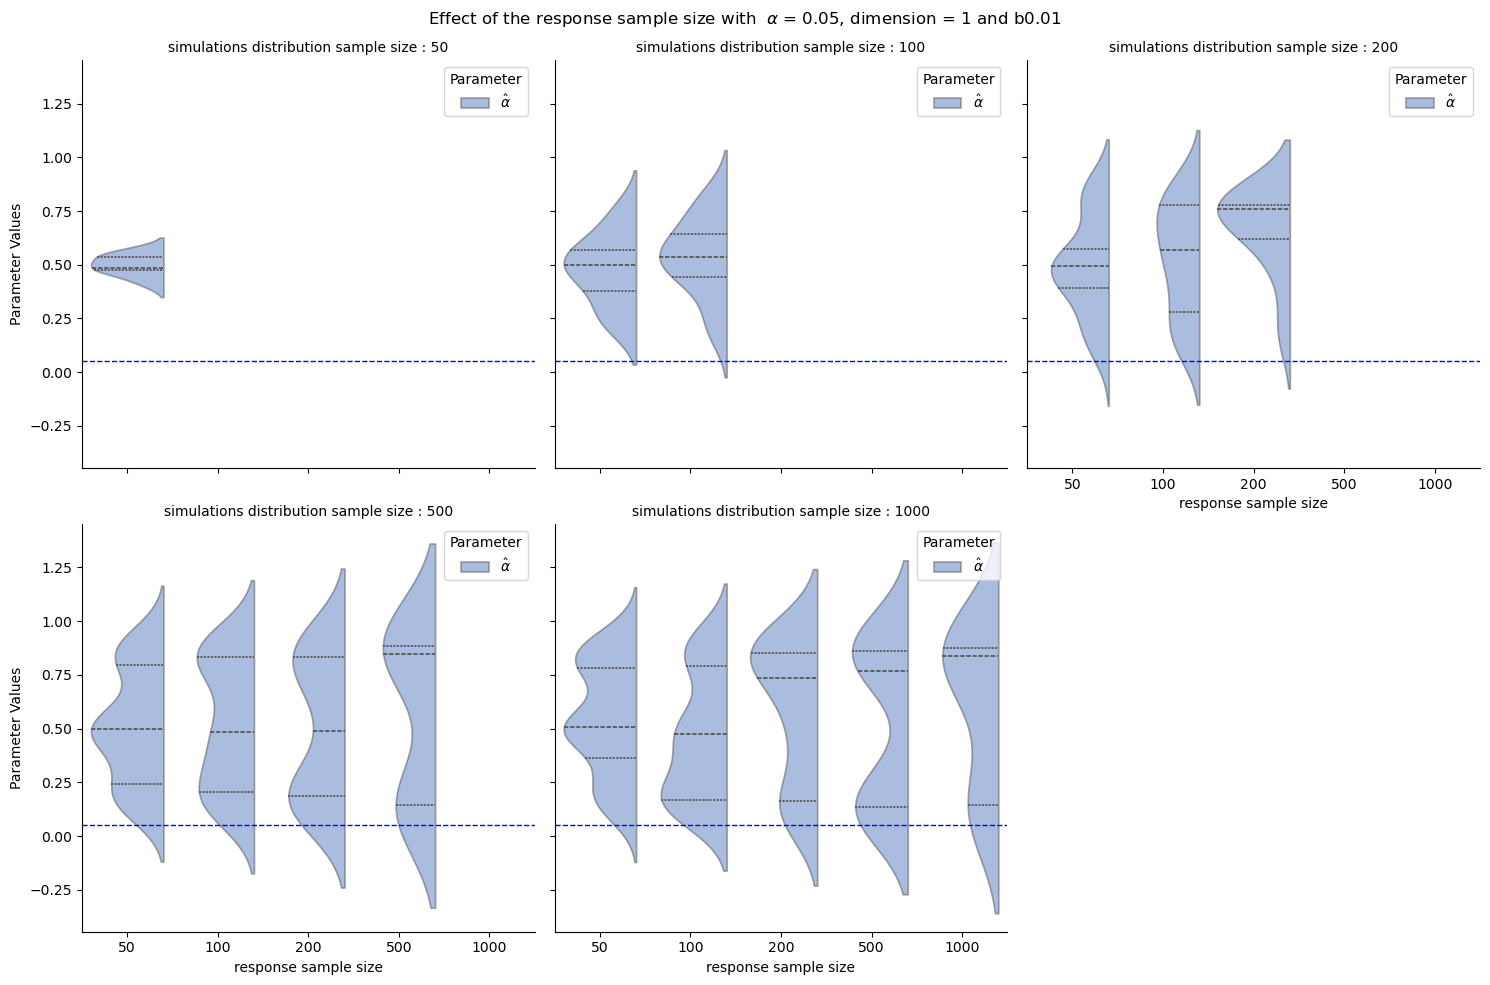

created and saved 1 figures


In [21]:
# ### Y sample size effect

# %%
# go through the different simulation runs => 180
counter = 0
# Iterate through each combination of index levels
for alpha, dim, b in param_combinations:

	simulations_df = df_last_150_aggregated_index_reset[(df_last_150_aggregated_index_reset["alpha"]==alpha) 
						     & (df_last_150_aggregated_index_reset["dim"]==dim) 
						     & (df_last_150_aggregated_index_reset["b"]==b)]
	
	# Reset the multi-index and flatten the columns
	simulations_df = simulations_df.reset_index()
	simulations_df.columns = ['_'.join(filter(None, col)).strip() for col in simulations_df.columns.values]

	# # Melt the DataFrame to long format for easier plotting with seaborn
	df_long = pd.melt(simulations_df, id_vars=['ysize', 'xsize'], value_vars=['alpha_hat_mean'], 
			var_name='Type', value_name='Mean')

	# Create a FacetGrid for separate violin plots by xsize
	g = sns.FacetGrid(df_long, col="xsize", col_wrap=3, sharey=True, height=5, aspect=1)

	# Map the violinplot to the FacetGrid
	g.map_dataframe(sns.violinplot, x='ysize', y='Mean', hue='Type', split=True, inner='quartile', palette='muted', alpha=0.5)

	# Add horizontal lines to each subplot
	for ax in g.axes.flat:
		ax.axhline(y=alpha, color='blue', linestyle='--', linewidth=1)
		

	# Get handles and labels from the first axis
	handles, labels = g.axes.flat[0].get_legend_handles_labels()

	# Replace old labels with LaTeX formatted ones

	
	new_labels = [r'$\hat{\alpha}$'for label in labels]

	# Manually add the new legend
	# Create a new legend with the handles and updated labels
	for ax in g.axes.flat:
		ax.legend(handles=handles, labels=new_labels, title='Parameter')

	# Set titles and axis labels
	g.set_axis_labels('response sample size', 'Parameter Values')
	g.set_titles(col_template='simulations distribution sample size : {col_name}')

	# Adjust the main title
	plt.subplots_adjust(top=0.93)

	alpha_latex = r"$\alpha$"

	g.figure.suptitle(f'Effect of the response sample size with  {alpha_latex} = {alpha}, dimension = {dim} and {b}')

	file_name = f"alpha{alpha}_dim{dim}_{b}_yeffect"

	#plt.savefig(f"{saving_path_sample_size_effect}/{file_name}.png")
	plt.show()

	plt.close()

	counter += 1

	print(f"created and saved {counter} figures")

	if counter == 1:
		break

	

# xsample size effect

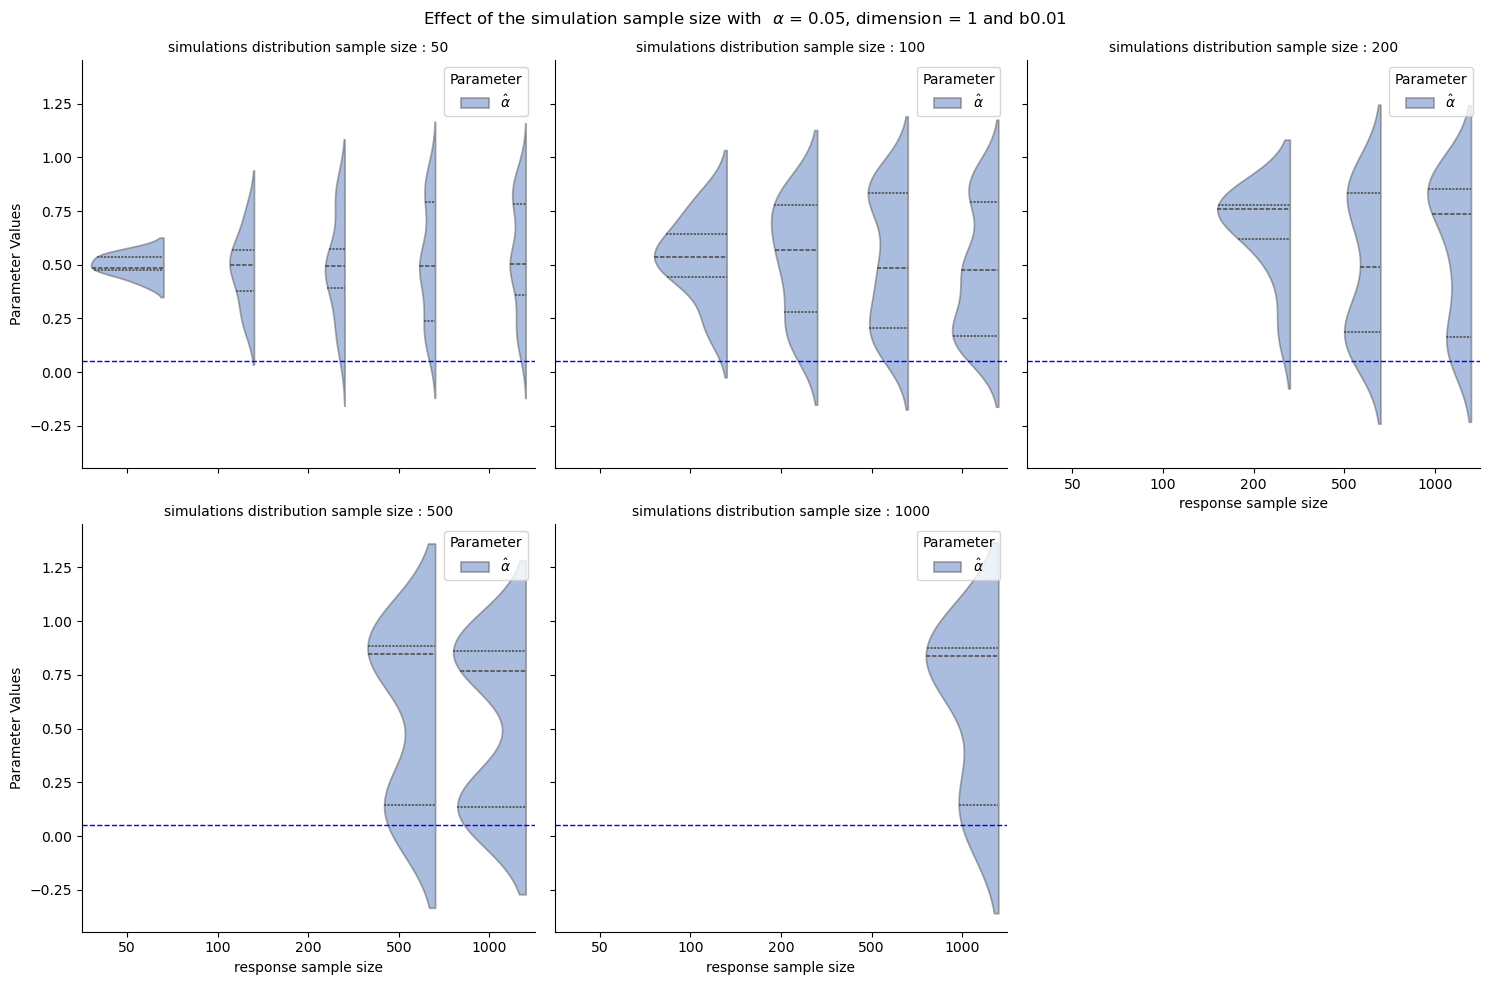

created and saved 1 figures


In [22]:
# ### Y sample size effect

# %%
# go through the different simulation runs => 180
counter = 0
# Iterate through each combination of index levels
for alpha, dim, b in param_combinations:

	simulations_df = df_last_150_aggregated_index_reset[(df_last_150_aggregated_index_reset["alpha"]==alpha) 
						     & (df_last_150_aggregated_index_reset["dim"]==dim) 
						     & (df_last_150_aggregated_index_reset["b"]==b)]
	
	# Reset the multi-index and flatten the columns
	simulations_df = simulations_df.reset_index()
	simulations_df.columns = ['_'.join(filter(None, col)).strip() for col in simulations_df.columns.values]

	# # Melt the DataFrame to long format for easier plotting with seaborn
	df_long = pd.melt(simulations_df, id_vars=['ysize', 'xsize'], value_vars=['alpha_hat_mean'], 
			var_name='Type', value_name='Mean')

	# Create a FacetGrid for separate violin plots by xsize
	g = sns.FacetGrid(df_long, col="ysize", col_wrap=3, sharey=True, height=5, aspect=1)

	# Map the violinplot to the FacetGrid
	g.map_dataframe(sns.violinplot, x='xsize', y='Mean', hue='Type', split=True, inner='quartile', palette='muted', alpha=0.5)

	# Add horizontal lines to each subplot
	for ax in g.axes.flat:
		ax.axhline(y=alpha, color='blue', linestyle='--', linewidth=1)
		

	# Get handles and labels from the first axis
	handles, labels = g.axes.flat[0].get_legend_handles_labels()

	# Replace old labels with LaTeX formatted ones

	
	new_labels = [r'$\hat{\alpha}$'for label in labels]

	# Manually add the new legend
	# Create a new legend with the handles and updated labels
	for ax in g.axes.flat:
		ax.legend(handles=handles, labels=new_labels, title='Parameter')

	# Set titles and axis labels
	g.set_axis_labels('response sample size', 'Parameter Values')
	g.set_titles(col_template='simulations distribution sample size : {col_name}')

	# Adjust the main title
	plt.subplots_adjust(top=0.93)

	alpha_latex = r"$\alpha$"

	g.figure.suptitle(f'Effect of the simulation sample size with  {alpha_latex} = {alpha}, dimension = {dim} and {b}')

	file_name = f"alpha{alpha}_dim{dim}_{b}_xeffect"

	#plt.savefig(f"{saving_path_sample_size_effect}/{file_name}.png")
	plt.show()

	plt.close()

	counter += 1

	print(f"created and saved {counter} figures")

	if counter == 1:
		break

	